In [1]:
import numpy as np
import random as rnd

In [2]:
InputEq = 'x*x+x+x+1-4'


In [3]:
Terminalset = ['x','1','2','3','4','5','6','7','8','9','x','x','x','x','x','x','x','x','x','x']
Functionset = ['*','/','+','-']
pra = ['(' , ')']
numberset = rnd.sample(range(20, 200), 30)

In [4]:
def InitalEq(terminal , function):
    flor = 1
    ciel = 17
    
    chosen = rnd.randrange(flor , ciel,2)
    
    right = rnd.choice(terminal)
    oprand = rnd.choice(function)
    lend = chosen
    result = ""
    flag = 1
    probability = rnd.randint(0,100)
    if(probability<10):
        result = rnd.choice(terminal)
        chosen = 1 
        return result
    
    while(lend > 0):
        left = rnd.choice(terminal) 
        right = rnd.choice(terminal)
        oprand = rnd.choice(function)
        if(flag == 1):
            
            result = result+"("+str(left) +str(oprand) +  str(right)+")"
            lend = lend-3
            flag = 0 
        else:
            p = rnd.randint(1,100)
            
            if(p>0 and p<5):
                a = "("+ str(left) + str(oprand) + str(right)+")"
                lr = str(rnd.choice(terminal))
                opr = str(rnd.choice(function))
                b = opr+"("+lr+opr+a+")"
                result = result + b
            elif(p>15 and p<30):
                a = "("+ str(left) + str(oprand) + str(right)+")"
                lr = str(rnd.choice(terminal))
                opr = str(rnd.choice(function))
                b = opr+"("+a+opr+lr+")"
                result = result + b
            elif(p>31 and p<39):
                a = "("+ str(left) + str(oprand) + str(right)+")"
                lr = str(rnd.choice(terminal))
                opr = str(rnd.choice(function))
                b = opr+"("+a+opr+lr+")"
                result = "("+result +b+")"
            else:
                a = str(oprand)+"("+ str(left) + str(oprand) + str(right)+")"
                result = result + a
            lend = lend-4
    if(len(result)>7):
        result = "("+result+")"
            
            
    return result
        
        
            
    

In [5]:
def CalcFitness(inputs,pop,numberset):

    #create needs
    inputans = []
    popans = [[0 for i in range(len(numberset))] for j in range(len(pop))]
    #calculate the output of input with the 50 numberset
    for i in range(len(numberset)):
        x = numberset[i]
        inputans.append( eval(inputs))
        
    #calculate the output of the population with the 50 number set 
    for i in range(len(pop)):
        for j in range(len(numberset)):
            x = numberset[j]
            try:
                 popans[i][j] = eval(pop[i][0])
            except ZeroDivisionError:
                popans[i][j] = None
            except SyntaxError:
                pop[i][0] = '('+pop[i][0]+')'
                try:
                    popans[i][j] = eval(pop[i][0])
                except ZeroDivisionError:
                    popans[i][j] = None
    

    #calculate the fitness of the population 
    counter = 0
    for i in range(len(popans)):
        for j ,w  in zip(popans[i] , inputans):
            if( j == w ):
                counter = counter +1
                    
        pop[i][1] = int(counter)
        counter = 0

   #penalty of fitness if fitness is too big 
    counted = len(inputs)
    cnt = 0
    for i in range(len(pop)):
        for j in (pop[i][0]):
            if(j !='(' and j !=')'):
                cnt +=1
        if(cnt > counted+10 and pop[i][1]>0 ):        
            pop[i][1] = int(pop[i][1]) - cnt
        cnt=0
        
    #type cast fitness      
    for i in range(len(pop)):
        pop[i][1] = int(pop[i][1])
    #sort fitness 
    pop = sorted(pop,key=lambda t: t[1],reverse=True)
    return pop

In [6]:
def ParentSelection(population):
    n = len(population)
    p = n*64/100
    r = int(n) - int(p)
    g1 = []
    g2=[]
    
    prob = rnd.randint(1,100)
    for i in range(int(p)):
        g1.append ( population[i])
    for i in range(int(p) ,n):
        g2.append (population[i])
        
    if(prob < 80):
        
        index = rnd.sample(range(0,int(p-1)),5)
        parent = g1[min(index)]
    else:
        index = rnd.sample(range(0,int(r-1)),5)
        parent = g2[min(index)]
        
    return parent
    

In [7]:
def CutBox(p,terminal,function):
    n = len(p)
    # print(p)
    select = rnd.randint(1,n-1)
    if(n<3):
        return p
    if(p[select]in function and p[select+1] == ')' and p[select-1] in terminal and p[select-2]=='(' ):
        return select +1
    if(p[select] in function and p[select+1] in terminal and  p[select-1]== ')' ):
        return select+1
    if(p[select] in function and p[select-1] in terminal and p[select+1] == '('):
        return select+1    
    if(p[select] in function and p[select-1] == ')' and p[select+1] == '('):
        return select +1
    if(p[select] in function and p[select+1] in terminal and p[select-1] in terminal  and p[select-2] == '('  and p[select-3] == '(' and p[select+2] == ')'  and p[select+3] == ')'):
        return select +1
        
    else:
        return CutBox(p,terminal,function)
        
            
            
    
    

In [8]:
InputEq = 'x*x+x+x+1-4'


In [9]:
def Xover(parent1,parent2,terminal,function):
    p1 = [*parent1[0]]
    p2= [*parent2[0]]
    n1 = len(parent1[0])
    n2 = len(parent2[0])
    if(n1==1):
        part1=parent1[0]+rnd.choice(function)
        part2=parent1[0]
    elif(n1 == 5):
        part1 = parent1[0][1:3]
        part2 = parent1[0][3:n1-1]
    else:
        
        point1 = CutBox(p1,terminal,function)
        part1=parent1[0][1:point1]
        part2=parent1[0][point1:n1-1]
        nn1 = len(part1)
        nn2 = len(part2)
            
            
    if(n2==1):
        part3=parent2[0]+rnd.choice(function)
        part4=parent2[0]
    elif(n2 == 5):
        part3 = parent2[0][1:3]
        part4 = parent2[0][3:n2-1]
    else:
       
        point2 = CutBox(p2,terminal,function)
        part3=parent2[0][1:point2]
        part4=parent2[0][point2:n2-1]


    # print('part1: ', part1)
    # print('part2: ',part2)
    # print('part3: ',part3)
    # print('part4: ',part4)
    child1 = part1+part4
    child2 = part3+part2
    # print('child1: ' ,child1 )
    # print('child2: ', child2)
    
    #control number of pranthesessfor child 1 
    c1o = 0
    c1c = 0
    for i in range(len(child1)):
        # if(child1[i] in terminal and child1[i+1] not in function):
        #     child1[i]
        
        if(child1[i]=='('):
            c1o +=1
        if(child1[i]==')'):
            c1c +=1
            
            
    if(c1o-c1c!=0):
        if(c1o>c1c):
            c = c1o-c1c
            for i in range(c):
                child1 = child1+')'
        if(c1o<c1c):
            c = c1c - c1o
            for i in range(c):
                child1 = '('+child1
            
    #control number of pranthesess for child 2
    c2o = 0
    c2c = 0
    for i in range(len(child2)):
        if(child2[i]=='('):
            c2o +=1
        if(child2[i]==')'):
            c2c +=1
            
            
    if(c2o-c2c!=0):
        if(c2o>c2c):
            c = c2o-c2c
            for i in range(c):
                child2 = child2+')'
        if(c2o<c2c):
            c = c2c - c2o
            for i in range(c):
                child2 = '('+child2
                
                
    if(len(child1)>=3):
        child1 = "("+child1+")"         

    if(len(child2)>=3):
        child2 = "("+child2+")" 
        
    child1=Control(child1)
    child2=Control(child2)
        
    child1 = [child1 , 0] 
    child2 = [child2 , 0] 
    return child1 , child2   


In [10]:
def mutation(parent,terminal , function):
    n = len(parent[0])
    p = [*parent[0]]
    select = rnd.randint(0,n-1)
    
    
    
    if(parent[0][select] in terminal):
        
        p[select] = rnd.choice(terminal)
        
        s =''.join(p)
        # print(s)
        parent[0] = s
        parent = Control(parent)
        return parent
        
        
    elif(parent[0][select] in function):
        
        p[select] = rnd.choice(function)
        s=''.join(p)
        # print(s)
        parent[0] = s
        parent = Control(parent)
        return parent
        
    else:
        return mutation(parent,terminal , function)
        
    
    

In [11]:
def mutation2(parent,terminal , function):
    n = len(parent[0])
    p = [*parent[0]]
    select = rnd.randint(0,n-1)
    if(n<5):
        return mutation(parent,terminal , function)
    
    if(p[select] =='(' and p[select+1] in terminal and p[select+2] in function and p[select+3] in terminal and p[select+4]==')' ):
        # print('pt1')
        # print(p[select],p[select+1],p[select+2],p[select+3],p[select+4])
        p[select] ='('
        p[select+1]  = rnd.choice(terminal)
        p[select+2]  = rnd.choice(function)
        p[select+3]  = rnd.choice(terminal)
        p[select+4]  = ')'
        l= rnd.randint(0,100)
        if(l<15):
            p.insert(select+5,rnd.choice(function))
            p.insert(select+6,'(')
            p.insert(select+7,rnd.choice(terminal))
            p.insert(select+8,rnd.choice(function))
            p.insert(select+9,rnd.choice(terminal))
            p.insert(select+10, ')')
        # print('here:')
        # print(p[select],p[select+1],p[select+2],p[select+3],p[select+4])
        s =''.join(p)
        # print(s)
        parent[0] = s
        parent = Control(parent)
        return parent
        
        
    else:
        return mutation2(parent,terminal , function)
    

In [12]:
def SurvivalSelection(children , population ):
    x = len(population)
    perc = int(x*1/100)
    elite = []
    n = len(children)
    for i in range(perc):
        elite.append(population[i])
        
    for i in reversed (range(n-perc,n)):
        del children[i]
        
    for i in range(len(elite)):
        children.append(elite[i])
        
    #sort fitness 
    children = sorted(children,key=lambda t: t[1],reverse=True)
    
    return children
    
        
    
        

In [13]:
def Control(p):
    a = len(p)
    if(p[0] == '(' and p[1] == '(' and p[2] == '(' and p[3] == '('  and p[a-1] == ')' and p[a-2] == ')'and p[a-3] == ')' and p[a-4] == ')'  ):
        p = p[0:a-1]
        p = p[1:]
        return p
    else:
        return p
        

In [14]:
#initail first population
pop = [[0 for i in range(2)] for j in range(2000)]

for i in range(2000):
    equation= InitalEq(Terminalset,Functionset)
    pop[i][0]=(equation)


In [15]:
# for i in range(len(population)):
#     if(int(population[i][1]) > 0):
#         print(population[i])

In [16]:
population = CalcFitness(InputEq , pop , numberset)

In [17]:
bestfitness = []
for w in range(10):
    pop = [[0 for i in range(2)] for j in range(2000)]

    for i in range(2000):
        equation= InitalEq(Terminalset,Functionset)
        pop[i][0]=(equation)
    population = CalcFitness(InputEq , pop , numberset)

    for i in range(200):
        children = []
        while(len(children)<2000):
            prob = rnd.randint(0,100)
            if(prob>18):
                parent1 = ParentSelection(population)
                parent2=ParentSelection(population)
                child1 , child2 = Xover(parent1,parent2,Terminalset,Functionset)
                children.append(child1)
                children.append(child2)
            else:
                parent = ParentSelection(population)
                prob2 = rnd.randint(1,100)
                if(prob2>50):
                    child = mutation(parent,Terminalset , Functionset)
                else:
                    child = mutation2(parent,Terminalset , Functionset)

                children.append(child)
        children =  CalcFitness(InputEq , children , numberset)
        population = SurvivalSelection(children , population )
        if(population[i][1]==30):
            print('in run ',w+1 , 'soloution found in itration  : ',i, population[i])
            bestfitness.append(population[i][1])
            break
        if(i%50 == 0):
            print('Run : ',w+1 ,',Itration : ', i+1 ,' ,rank1  = ', population[i])
        if(i == 199):
            print('run' , w+1,'soloution is :',population[i])
            bestfitness.append(population[i][1])
        

in run  1 soloution found in itration  :  0 ['((x*x)+(x+x)-3)', 30]
Run :  2 ,Itration :  1  ,rank1  =  ['((3+2)-(x-x)-(8-x)*(9*5))', 1]
Run :  2 ,Itration :  51  ,rank1  =  ['((((4*9)+(x*x)+1)))', 1]
in run  2 soloution found in itration  :  68 ['(((4+x)+(x*x)+(x-7)))', 30]
Run :  3 ,Itration :  1  ,rank1  =  ['((x*x)+((5*9)+6))', 1]
in run  3 soloution found in itration  :  43 ['((((x-3)+(x*x)+x)))', 30]
in run  4 soloution found in itration  :  0 ['((7/7)*(x*x)+(x+5)-(8-x))', 30]
Run :  5 ,Itration :  1  ,rank1  =  ['(((x+x)+(x+9)+((8-x)+7))-(x-(x*x)))', 1]
Run :  5 ,Itration :  51  ,rank1  =  ['(((x/x)+(1-x)*((x/6)*(3-x))))', 0]
in run  5 soloution found in itration  :  59 ['((((x-3)+(x/x)*(x*x)+x)))', 30]
Run :  6 ,Itration :  1  ,rank1  =  ['(4*x)', 0]
Run :  6 ,Itration :  51  ,rank1  =  ['((((x-6)*(8+x)+x)))', 1]
Run :  6 ,Itration :  101  ,rank1  =  ['((((x-6)*(8+x)+x)))', 1]
Run :  6 ,Itration :  151  ,rank1  =  ['((((x-6)*(8+x)+x)))', 1]
run 6 soloution is : ['((((x-6)*(8+x)

In [16]:
import matplotlib.pyplot as plt

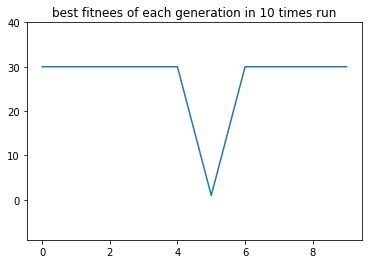

In [19]:
data=[]
bestfitness = np.array(bestfitness)
for i in range(10):
    data.append(i)
plt.figure()    
plt.plot(data,bestfitness)    
plt.ylim(bestfitness.min()-10,bestfitness.max()+10)
plt.title('best fitnees of each generation in 10 times run')
plt.show()

In [20]:
bestfitness

array([30, 30, 30, 30, 30,  1, 30, 30, 30, 30])

In [35]:
bestfitness = []
avgfit =[]
pop = [[0 for i in range(2)] for j in range(2000)]

for i in range(2000):
    equation= InitalEq(Terminalset,Functionset)
    pop[i][0]=(equation)
population = CalcFitness(InputEq , pop , numberset)

for i in range(200):
    children = []
    while(len(children)<2000):
        prob = rnd.randint(0,100)
        if(prob>20):
            parent1 = ParentSelection(population)
            parent2=ParentSelection(population)
            child1 , child2 = Xover(parent1,parent2,Terminalset,Functionset)
            children.append(child1)
            children.append(child2)
        else:
            parent = ParentSelection(population)
            prob2 = rnd.randint(1,100)
            if(prob2>50):
                child = mutation(parent,Terminalset , Functionset)
            else:
                child = mutation2(parent,Terminalset , Functionset)

            children.append(child)
    children =  CalcFitness(InputEq , children , numberset)
    population = SurvivalSelection(children , population )
    if(population[i][1]==30):
        print(  'soloution found in itration  : ',i, population[i])
        bestfitness.append(population[i][1])
        break
    if(i%10 == 0):
        print('Itration : ', i+1 ,' ,rank1  = ', population[i])
    if(i == 199):
        print('soloution is :',population[i])
    bestfitness.append(population[i][1])
    sum=0
    for j in range(len(population)):
        sum = sum + population[j][1]

    avg = sum / len(population)
    avgfit.append(avg)
    if(i%10 == 0):
        print('AVG Fitt = ',avg)
        

Itration :  1  ,rank1  =  ['((5*8)*((9*2)+x)+5)', 1]
AVG Fitt =  0.001
Itration :  11  ,rank1  =  ['(((x*(x/x)*x)+(x/4)+(3+2)))', 0]
AVG Fitt =  0.0005
Itration :  21  ,rank1  =  ['(((6-x)*(x/3)/(2+x)-(6/x)))', 0]
AVG Fitt =  0.015
Itration :  31  ,rank1  =  ['((((x-x))*(x-1)))', 0]
AVG Fitt =  0.1655
soloution found in itration  :  33 ['(((x+3)*(x-1)))', 30]


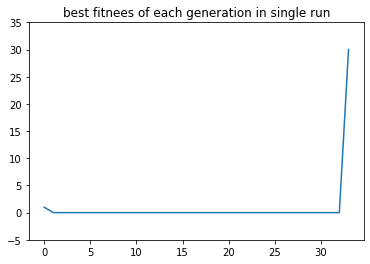

In [38]:
data=[]
bestfitness = np.array(bestfitness)
for i in range(len(bestfitness)):
    data.append(i)
plt.figure()    
plt.plot(data,bestfitness)    
plt.ylim(bestfitness.min()-5,bestfitness.max()+5)
plt.title('best fitnees of each generation in single run')
plt.show()

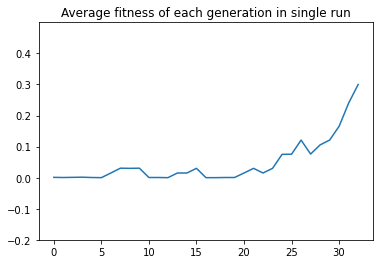

In [39]:
data=[]
avgfit = np.array(avgfit)
for i in range(len(avgfit)):
    data.append(i)
plt.figure()    
plt.plot(data,avgfit)    
plt.ylim(avgfit.min()-0.2,avgfit.max()+0.2)
plt.title('Average fitness of each generation in single run')
plt.show()